# Objetivo
Objetivo desse projeto será a implementação de dois algoritmos de aglomeração e testá-los para segmentar imagem de placa petri com uma cultura de fungos.
### Divisão da placa
- Fungo;
- Borda da placa;
- Área interna da placa sem fungo;
- Área externa da placa.
### Algoritmos de Aglormeração
- K-means
- K-medoids

# Importando bibliotecas

In [111]:
import cv2 as cv
import numpy as np
from matplotlib import pyplot as plt 
from sklearn.cluster import KMeans
from sklearn_extra.cluster import KMedoids

# K-means
Escolher K objetos que serão a base de cada grupo, chamados de centróide, enquanto os demais objetos serão associados ao centróide mais próximo. Após essa primeira alocação, os valores das coordenadas dos centróides serão refinados dentre os objetos de seu próprio grupo e os demais objetos serão realocados ao centróide mais próximo após o 'refinamento'. Esse processo é repetido até a convergência dos dados.

### Leitura da imagem

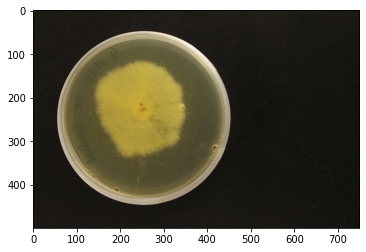

In [112]:
image = cv.imread('Test image.JPG')
imageRGB = cv.cvtColor(image, cv.COLOR_BGR2RGB)
plt.imshow(imageRGB)

### Remodulando Imagem para matriz bidimensional

In [113]:
matriz_img = imageRGB.reshape(-1, 3)
matriz_img = np.float32(matriz_img)

Agora, podemos implementar o algoritmo k-means

### Definindo criteria e número de clusters
Assim como dito anteriormente, iremos dividir nossa imagem em 4 clusters:
- Fungo;
- Borda da placa;
- Área interna da placa sem fungo;
- Área externa da placa;

Portanto, faremos k = 4. 
Também iremos definir nosso critério de parada para o algoritmo: faremos 1000 iterações ou iremos iterar até obtermos acurácia de 85%.

In [114]:
K = 4
criteria = (cv.TERM_CRITERIA_EPS + cv.TERM_CRITERIA_MAX_ITER, 1000, 0.85)

### Implementação algoritmo k-means
Tendo definido nosso critério de parada e o número de clusters, iremos implementar o algoritmo com centroídes aleatórios como centroídes iniciais.

In [115]:
ret,label,center = cv.kmeans(matriz_img,K,None,criteria,100,cv.KMEANS_RANDOM_CENTERS)

### Convertendo imagem segmentada para seu formato original

In [116]:
center = np.uint8(center)
imagem_segmentada = center[label.flatten()]
imagem_segmentada = imagem_segmentada.reshape((imageRGB.shape))

### Visualizando saída

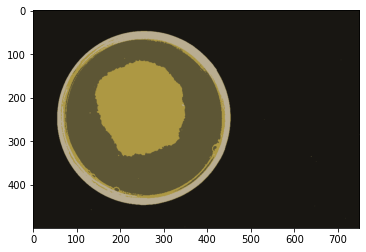

In [117]:
plt.imshow(imagem_segmentada)

# K-medoids
O algoritmo do k-medoids funciona semelhante ao k-means, com a diferença principal que o centroíde do k-medoids é um dos pontos do conjunto de dados, chamado de medoíde, enquanto o centroíde do k-means não precisa pertencer ao conjunto de dados.
Dessa forma, cada elemento será agrupado conforme sua similaridade aos medoídes pré-definidos, sendo atualizado por um representante do mesmo grupo até convergir. 

### Leitura da Imagem e Reformulando para Matriz Bidimensional

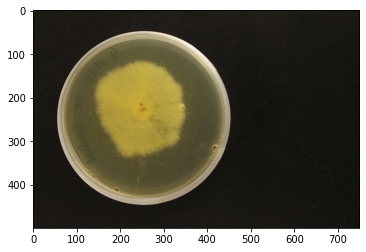

In [118]:
image = cv.imread('Test image.JPG')
imageRGB = cv.cvtColor(image, cv.COLOR_BGR2RGB)
plt.imshow(imageRGB)

### Remodulando Imagem para matriz bidimensional
Note que teremos que reformular o tamanho da imagem para não obter erro do código não ser computado ao tentarmos modular nossa imagem para o formato matricial.
Para isso, usaremos o método "resize()" da biblioteca cv para redimensionar nossa imagem numa escala de 25% da original.

In [119]:
width = int(image.shape[1] * 25 / 100)
height = int(image.shape[0] * 25 / 100)
dim = (width, height)
image_resized = cv.resize(imageRGB, dim, interpolation=cv.INTER_AREA)
matriz_img = image_resized.reshape(-1, 3)
matriz_img = np.float32(matriz_img)

### Definindo critéria e número de clusters
Novamente, iremos dividir nossa imagem em 4 clusters e iremos definir o número máximo de iterações para 1000.

In [120]:
k = 4
max_int = 1000

### Implementação algoritmo k-medoids
Tendo definido critério de parada e número de clusters, o algoritmo está pronto para ser rodado. Além disso, escolheremos metroídes aleatórios como metroídes iniciais

In [121]:
k_medoids = KMedoids(n_clusters=k, method="pam", init="random", max_iter=max_int).fit(matriz_img)

### Convertendo imagem segmentada para seu formato original

In [122]:
center = np.uint8(k_medoids.cluster_centers_)
imagem_segmentada = center[k_medoids.labels_.flatten()]
imagem_segmentada = imagem_segmentada.reshape((image_resized.shape))

### Visualizando a saída

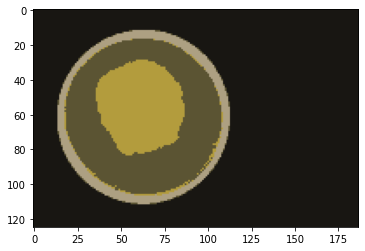

In [123]:
plt.imshow(imagem_segmentada)

# Conclusão
Os dois algoritmos utilizados para segmentação de imagens obtiveram resultados satisfatórios. No entanto, podemos observar uma precisão maior relacionada ao k-medoids, assim como esperado, junto de um maior custo computacional para ser computado, necessitando até mesmo do redimensionamento da imagem para ser utilizado.